In [74]:
import numpy as np

import matplotlib.pyplot as plt
import sklearn
%load_ext cudf.pandas
# pandas API is now GPU accelerated

import pandas as pd

The cudf.pandas extension is already loaded. To reload it, use:
  %reload_ext cudf.pandas


# Importar datos

In [75]:
#Cargamos los datos
! pip install openpyxl
data = pd.read_excel('data/bosch_aic_datathon.xlsx')

# Hacemos copia de los datos
data_sucia = data
data_sucia.head()

,Posición,Area,Á.liq.,Grupo de personal,CODIGO POSTAL,Motivo de la RENUNCIA,Banda,Baja,ReglaPHT,Alta,Años,Meses,Antigüedad,Clave de sexo,Lugar de nacimiento,Nacionalidad,Edad del empleado,¿Cuanto tiempo tiene viviendo en Cd. Juarez?,Estado Civil,Hijos
0,POS514,LOG,S6,Exempt,32520,Vol-Otro empleo,E3,2023-01-02,ADMINIST,2018-06-21,5,55.200000,1656,Femenino,JUAREZ,Mexican,31,None,solter,0
1,POS1745,MFS,S5,Direct,32217,Vol-Otro empleo,DNO,2023-01-03,ADMINIST,2017-07-20,6,66.433333,1993,Masculino,DURANGO,Mexican,25,10+ Years,solter,0
2,POS1230,VS7,S5,Direct,32600,Vol-Otro empleo,DNO,2023-01-03,JT012324,2019-08-29,4,40.766667,1223,Masculino,JUAREZ,Mexican,23,10+ Years,solter,0
3,POS1661,MFS,S5,Direct,32575,Vol-Estudios,DO,2023-01-03,JT012324,2022-11-03,1,2.033333,61,Femenino,CIUDAD JUAREZ,Mexican,18,10+ Years,solter,0
4,POS1921,MFS,S5,Direct,32575,Vol-Cambio de domicilio,DO,2023-01-03,JT012324,2017-03-02,6,71.100000,2133,Masculino,JUAREZ,Mexican,26,10+ Years,solter,0


# Limpieza por columnas

In [76]:
# Poner todas las columnas en mayúsculas
data_sucia.columns = map(str.upper, data_sucia.columns)
data_sucia.head()

,POSICIÓN,AREA,Á.LIQ.,GRUPO DE PERSONAL,CODIGO POSTAL,MOTIVO DE LA RENUNCIA,BANDA,BAJA,REGLAPHT,ALTA,AÑOS,MESES,ANTIGÜEDAD,CLAVE DE SEXO,LUGAR DE NACIMIENTO,NACIONALIDAD,EDAD DEL EMPLEADO,¿CUANTO TIEMPO TIENE VIVIENDO EN CD. JUAREZ?,ESTADO CIVIL,HIJOS
0,POS514,LOG,S6,Exempt,32520,Vol-Otro empleo,E3,2023-01-02,ADMINIST,2018-06-21,5,55.200000,1656,Femenino,JUAREZ,Mexican,31,None,solter,0
1,POS1745,MFS,S5,Direct,32217,Vol-Otro empleo,DNO,2023-01-03,ADMINIST,2017-07-20,6,66.433333,1993,Masculino,DURANGO,Mexican,25,10+ Years,solter,0
2,POS1230,VS7,S5,Direct,32600,Vol-Otro empleo,DNO,2023-01-03,JT012324,2019-08-29,4,40.766667,1223,Masculino,JUAREZ,Mexican,23,10+ Years,solter,0
3,POS1661,MFS,S5,Direct,32575,Vol-Estudios,DO,2023-01-03,JT012324,2022-11-03,1,2.033333,61,Femenino,CIUDAD JUAREZ,Mexican,18,10+ Years,solter,0
4,POS1921,MFS,S5,Direct,32575,Vol-Cambio de domicilio,DO,2023-01-03,JT012324,2017-03-02,6,71.100000,2133,Masculino,JUAREZ,Mexican,26,10+ Years,solter,0


### Posicion

In [77]:
data_sucia[["POSICIÓN"]]

,POSICIÓN
0,POS514
1,POS1745
2,POS1230
3,POS1661
4,POS1921
...,...
1398,POS790
1399,POS2802
1400,POS538
1401,POS538


In [78]:
data_sucia["POSICIÓN"].unique()

array(['POS514', 'POS1745', 'POS1230', 'POS1661', 'POS1921', 'POS2803',
       'POS538', 'POS1380', 'POS2094', 'POS2003', 'POS347', 'POS1376',
       'POS1323', 'POS2939', 'POS581', 'POS1657', 'POS2384', 'POS2553',
       'POS2802', 'POS2076', 'POS2046', 'POS2856', 'POS1683', 'POS750',
       'POS907', 'POS2745', 'POS1884', 'POS2858', 'POS1559', 'POS841',
       'POS2167', 'POS2817', 'POS1373', 'POS1788', 'POS343', 'POS2847',
       'POS970', 'POS977', 'POS2456', 'POS1111', 'POS2718', 'POS1227',
       'POS2062', 'POS1116', 'POS251', 'POS454', 'POS1010', 'POS1181',
       'POS2988', 'POS1056', 'POS1974', 'POS213', 'POS1365', 'POS2224',
       'POS1845', 'POS1203', 'POS2338', 'POS1439', 'POS500', 'POS1783',
       'POS1702', 'POS1748', 'POS2622', 'POS1488', 'POS780', 'POS1210',
       'POS124', 'POS1667', 'POS1410', 'POS2915', 'POS96', 'POS698',
       'POS139', 'POS1520', 'POS1819', 'POS2913', 'POS1448', 'POS2497',
       'POS2698', 'POS1145', 'POS2848', 'POS723', 'POS1100', 'POS2756',

### Area

### A Liquida

<Axes: ylabel='Á.LIQ.'>

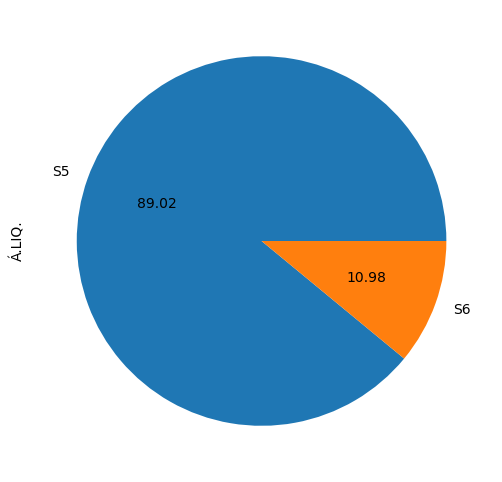

In [79]:
# Convierte columna Á.liq. a categoricos
data_sucia['Á.LIQ.'] = data_sucia['Á.LIQ.'].astype('category')
# Hace plot de pie de la columna Á.liq.
data_sucia['Á.LIQ.'].value_counts().plot(kind='pie', autopct='%.2f', figsize=(6, 6))


In [80]:
# C

### Grupo de personal

### Codigo postal

In [81]:
# Eliminar filas que tengan menos de 5 digitos en la columna 'CODIGO POSTAL'
data_sucia = data_sucia[data_sucia['CODIGO POSTAL'].astype(str).str.len() >= 5]
# Eliminar filas que tengan más de 5 digitos en la columna 'CODIGO POSTAL'
data_sucia = data_sucia[data_sucia['CODIGO POSTAL'].astype(str).str.len() <= 5]

# Crear un DataFrame con las primeras 5 filas de data_sucia
#data_sucia5 = data_sucia.head(5)

#data_sucia5

In [82]:
"""
import pgeocode
import pandas as pd
from geopy.distance import geodesic

# Función para calcular la distancia entre dos códigos postales
def calcular_distancia(codigo_postal_origen, codigo_postal_destino, pais='MX'):
    geolocator = pgeocode.Nominatim(pais)
    ubicacion_origen = geolocator.query_postal_code(codigo_postal_origen)
    ubicacion_destino = geolocator.query_postal_code(codigo_postal_destino)

    # Verificar si ambos códigos postales tienen información de ubicación válida
    if pd.notna(ubicacion_origen.latitude) and pd.notna(ubicacion_destino.latitude):
        coords_origen = (ubicacion_origen.latitude, ubicacion_origen.longitude)
        coords_destino = (ubicacion_destino.latitude, ubicacion_destino.longitude)
        return geodesic(coords_origen, coords_destino).kilometers
    else:
        return None

# Código postal de referencia
codigo_postal_referencia = 32557

# Calcular la distancia para cada fila en el DataFrame
data_sucia['Distancia'] = data_sucia['CODIGO POSTAL'].apply(lambda x: calcular_distancia(x, codigo_postal_referencia))

# Exportar los datos a CSV
data_sucia.to_csv('data_sucia.csv', index=False)

data_sucia
"""

,POSICIÓN,AREA,Á.LIQ.,GRUPO DE PERSONAL,CODIGO POSTAL,MOTIVO DE LA RENUNCIA,BANDA,BAJA,REGLAPHT,ALTA,...,MESES,ANTIGÜEDAD,CLAVE DE SEXO,LUGAR DE NACIMIENTO,NACIONALIDAD,EDAD DEL EMPLEADO,¿CUANTO TIEMPO TIENE VIVIENDO EN CD. JUAREZ?,ESTADO CIVIL,HIJOS,Distancia
0,POS514,LOG,S6,Exempt,32520,Vol-Otro empleo,E3,2023-01-02,ADMINIST,2018-06-21,...,55.200000,1656,Femenino,JUAREZ,Mexican,31,NaN,solter,0,10.815469
1,POS1745,MFS,S5,Direct,32217,Vol-Otro empleo,DNO,2023-01-03,ADMINIST,2017-07-20,...,66.433333,1993,Masculino,DURANGO,Mexican,25,10+ Years,solter,0,18.258464
2,POS1230,VS7,S5,Direct,32600,Vol-Otro empleo,DNO,2023-01-03,JT012324,2019-08-29,...,40.766667,1223,Masculino,JUAREZ,Mexican,23,10+ Years,solter,0,18.460211
3,POS1661,MFS,S5,Direct,32575,Vol-Estudios,DO,2023-01-03,JT012324,2022-11-03,...,2.033333,61,Femenino,CIUDAD JUAREZ,Mexican,18,10+ Years,solter,0,6.025403
4,POS1921,MFS,S5,Direct,32575,Vol-Cambio de domicilio,DO,2023-01-03,JT012324,2017-03-02,...,71.100000,2133,Masculino,JUAREZ,Mexican,26,10+ Years,solter,0,6.025403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1398,POS790,QMM,S6,Exempt,32585,Vol-Transferencia entre planta,E4,2022-12-31,ADMINIST,2011-09-12,...,137.600000,4128,Masculino,MEXICO DF,Mexican,44,NaN,casad.,0,5.665347
1399,POS2802,TEF,S5,Direct,32575,Vol-Cambio de domicilio,DNO,2022-07-26,JT012324,2015-08-05,...,84.900000,2547,Masculino,JUAREZ,Mexican,28,NaN,solter,0,6.025403
1400,POS538,VS7,S5,Direct,32575,Vol-No regreso / no dio razón,DNO,2022-09-02,JT031800,2022-07-21,...,1.433333,43,Femenino,CHIHUAHUA,Mexican,21,NaN,solter,0,6.025403
1401,POS538,VS9-ABS,S5,Direct,32600,Imp.Tra-Ausentismos continuos,DNO,2022-09-02,JT031800,2017-03-30,...,66.066667,1982,Femenino,VERACRUZ,Mexican,45,NaN,U.Libr,2,18.460211


In [100]:


# Volver a cargar los datos desde CSV
data_sucia = pd.read_csv('data_sucia.csv')

In [84]:
#! pip install pgeocode
import pgeocode

dist = pgeocode.GeoDistance('mx')
distance = dist.query_postal_code('45430', '44215')
print(distance)


27.22626893359597


In [85]:
# Eliminar numeros decimales de la columna "distancia"

#data_sucia['distancia'] = data_sucia['distancia'].astype(int)
data_sucia

,POSICIÓN,AREA,Á.LIQ.,GRUPO DE PERSONAL,CODIGO POSTAL,MOTIVO DE LA RENUNCIA,BANDA,BAJA,REGLAPHT,ALTA,...,MESES,ANTIGÜEDAD,CLAVE DE SEXO,LUGAR DE NACIMIENTO,NACIONALIDAD,EDAD DEL EMPLEADO,¿CUANTO TIEMPO TIENE VIVIENDO EN CD. JUAREZ?,ESTADO CIVIL,HIJOS,Distancia
0,POS514,LOG,S6,Exempt,32520,Vol-Otro empleo,E3,2023-01-02,ADMINIST,2018-06-21,...,55.200000,1656,Femenino,JUAREZ,Mexican,31,None,solter,0,10.815469
1,POS1745,MFS,S5,Direct,32217,Vol-Otro empleo,DNO,2023-01-03,ADMINIST,2017-07-20,...,66.433333,1993,Masculino,DURANGO,Mexican,25,10+ Years,solter,0,18.258464
2,POS1230,VS7,S5,Direct,32600,Vol-Otro empleo,DNO,2023-01-03,JT012324,2019-08-29,...,40.766667,1223,Masculino,JUAREZ,Mexican,23,10+ Years,solter,0,18.460211
3,POS1661,MFS,S5,Direct,32575,Vol-Estudios,DO,2023-01-03,JT012324,2022-11-03,...,2.033333,61,Femenino,CIUDAD JUAREZ,Mexican,18,10+ Years,solter,0,6.025403
4,POS1921,MFS,S5,Direct,32575,Vol-Cambio de domicilio,DO,2023-01-03,JT012324,2017-03-02,...,71.100000,2133,Masculino,JUAREZ,Mexican,26,10+ Years,solter,0,6.025403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,POS790,QMM,S6,Exempt,32585,Vol-Transferencia entre planta,E4,2022-12-31,ADMINIST,2011-09-12,...,137.600000,4128,Masculino,MEXICO DF,Mexican,44,None,casad.,0,5.665347
1397,POS2802,TEF,S5,Direct,32575,Vol-Cambio de domicilio,DNO,2022-07-26,JT012324,2015-08-05,...,84.900000,2547,Masculino,JUAREZ,Mexican,28,None,solter,0,6.025403
1398,POS538,VS7,S5,Direct,32575,Vol-No regreso / no dio razón,DNO,2022-09-02,JT031800,2022-07-21,...,1.433333,43,Femenino,CHIHUAHUA,Mexican,21,None,solter,0,6.025403
1399,POS538,VS9-ABS,S5,Direct,32600,Imp.Tra-Ausentismos continuos,DNO,2022-09-02,JT031800,2017-03-30,...,66.066667,1982,Femenino,VERACRUZ,Mexican,45,None,U.Libr,2,18.460211


### Motivo de la renuncia

In [86]:
# Reemplazar 'y/o' por 'y'
data_sucia['MOTIVO DE LA RENUNCIA'] = data_sucia['MOTIVO DE LA RENUNCIA'].replace(to_replace='y/o', value='y', regex=True)

# Luego, reemplazar '-' y '/' con un string vacío
data_sucia['MOTIVO DE LA RENUNCIA'] = data_sucia['MOTIVO DE LA RENUNCIA'].replace(to_replace='[-/]', value=' ', regex=True)

### Baja

### Alta

### Regla PHT

In [87]:
data_sucia["REGLAPHT"] = data_sucia["REGLAPHT"].astype('category')

### Años

Se mantiene igual ya que todos son tipo entero, además no existen valores nulos

### Meses

Se mantiene igual ya que todos son tipo flotante, además no existen valores nulos

### Dias totales/Antigüedad

Se mantiene igual ya que todos son tipo entero, además no existen valores nulos

### Sexo

In [88]:
data_sucia[["CLAVE DE SEXO"]]

,CLAVE DE SEXO
0,Femenino
1,Masculino
2,Masculino
3,Femenino
4,Masculino
...,...
1396,Masculino
1397,Masculino
1398,Femenino
1399,Femenino


In [89]:
data_sucia["CLAVE DE SEXO"].unique()

array(['Femenino', 'Masculino'], dtype=object)

In [90]:
reemplazo_sexo = {"Femenino":"F",
              "Masculino":"M"}

In [91]:
data_sucia['CLAVE DE SEXO'].replace(reemplazo_sexo)

0       F
1       M
2       M
3       F
4       M
       ..
1396    M
1397    M
1398    F
1399    F
1400    M
Name: CLAVE DE SEXO, Length: 1401, dtype: object

Falta susutituir la columna en data_sucia

### Lugar de nacimiento

In [92]:
# Limpia los datos de la columna Lugar de nacimiento a el nombre del estado de nacimiento. 
# Diccionario de reemplazos
reemplazos = {
    'CHIHUAHUA': ['AHUMADA', 'ALLENDE', 'ALLENDE, CHIH.', 'AZTECA CIUDAD JUAREZ', 'BALLEZA','BALLEZA, CHIHUAHUA','BUENAVENTURA','CAMARGO','CD JUAREZ',' CD JUAREZ CHIH','CD. JUAREZ','CD. JUAREZ CHIH','CD. JUAREZ CHIH.','CD. JUAREZ CHIHUAHUA','CD. JUAREZ, CHIH','CD. JUAREZ, CHIH.','CD. JUAREZ, CHIHUAHUA','CD.JUAREZ','CD.JUAREZ,CHIH','CHIHUAHUA CHIH.','CHAPAM','CIU','CIUDAD JUAREZ','CIUDAD JUAREZ, CHIH','CUAHUTEMOC','CUAHUTEMOC, CHIH','DELICIAS','DELICIAS CHIHUAHUA','EL MADERAL','GOMEZ FARIAS CHIHUAHUA','GOMEZ FARIAS, CHIHUAHU','GPE. VICTORIA CHIH.','HGO DEL PARRAL CHIH','HIDALGO DE PARRAL','HIDALGO DEL PARRAL','HIDALGO DEL PARRAL, CHIH.','JIMENEZ','JUAREZ','JUAREZ CHIHUAHUA','MADERA','NAICA, CHIHUAHUA','NUEVO CASA GRANDES, CHIH','NVO CASA GRANDES','PARRAL, CHIH','S.F. DEL ORO, CHIH','SANTA BARBARA','STA BARBARA','VILLA AHUMADA'],
    'DURANGO': ['CD GOMEZ PALACIO','CD. GOMEZ PALACIO','CUENCAME','GENERAL SIMON BOLIVAR', 'GOMEZ PALACIO', 'LERDO', 'MAPIMI', 'NAZAS', 'PANUCO DE CORONADO', 'PEÑON BLANCO', 'POANAS', 'POBLADO EL LUCERO', 'SAN DIMAS', 'SANTA MARIA DE OTAEZ', 'TLAHUALILO DE ZARAGOZA'],
    'AGUASCALIENTES': ['AGUASCALIENTES','AGUASCALIENTES'],
    'BAJA CALIFORNIA': ['ENSENADA BAJA CALIFORNIA','MEXICALI'],
    'BAJA CALIFORNIA SUR':['COMONDU'],
    'CAMPECHE':['MIGUEL.A.C. CAMPECHE'],
    'CHIAPAS':['AGENCAI TECTUAPAN','ARRIAGA','CINTALAPA','JIQUIPILAS','MAPASTEPEC','MOTOZINTLA','OCOSINGO','PIJIJIAPAN','TECPATAN','TUXTLA GUTIERREZ'],
    'CDMX':['DF','DISTRITO FEDERAL','MEXICO D.F','MEXICO D.F.','MEXICO DF','MIGUEL HIDALGO','VENUSTIANO CARRANZA'],
    'COAHUILA':['COAHILA','COAHUILA DE ZARAGOZA','E. NVO.MUNDO, CUAHUILA','EJISO NUEVO BENAVIDES','MATAMOROS COAH.','PIEDRAS NEGRAS','RAMOS ARIZPE','SALTILLO','SAN ANDRES COAH.','SAN RAFAEL ARRIBA, COAH.','TORREON','TORREON, COAHUILA','VIESCA'],
    'ESTADO DE MEXICO':['ATIZAPAN','CUAUTITLAN IZCALLI','MEXICO','MIGUEL ANGEL','OTUMBA','SANTA ROSA','TOLUCA','TOLUCA MEXICO','VILLA VICTORIA'],
    'GUANAJUATO':['GUANAJUATIO','IRAPUATO','LEON','OCAMPO','PENJAMO'],
    'GUERRERO':['ACAPULCO','JUAN R. ESCUDERO','XOCHIPALA'],
    'HIDALGO':['FRANCISCO I MADERO','FRANCISCO I. MADERO'],
    'JALISCO':['CIHUATLAN','GUADALAJARA','JUANACATLAN'],
    'MICHOACAN':['CARDENAS','LAZARO CARDENAS','PUNTA DE AGUA'],
    'MORELOS':['CUERNAVACA'],
    'NUEVO LEON':['GUADALUPE','MONTERREY','SAN PEDRO'],
    'OAXACA':['IXHUATAN','IXHUATAN DEL SURESTE','LOMA BONITA','LOMA BONITA, OAXACA','OAXACA DE JUAREZ','PASO DEL JOBO','SAN ANDRES OAX','SAN FELIPE USILA','SAN FRANCISCO DEL MAR','SAN FRANCISCO IXHUATAN','SAN JUAN BAUTISTA TUXTEPE','SAN LUCAS OJITLAN','TUXTEPEC','TUXTEPEC OAXACA'],
    'PUEBLA':['GUADALUPE ANALCO','GUADALUPE VICTORIA','PUEBLA, PUEBLA','TEZIUTLAN','VICENTE GUERRERO','ZARAGOZA'],
    'QUERETARO':['QUERETARO, QRO'],
    'SONORA':['AGUA PRIETA','CAJEME'],
    'SINALOA':['AHOME','CULIACAN','EL FUERTE','EL FUERTE SIN.','LOS MOCHIS'],
    'TAMAULIPAS':['MATAMOROS','TAMPICO'],
    'TABASCO':['VILLAHERMOSA','HUIMANGUILLO','COMALCALCO'],
    'TAMAULIPAS':['MATAMOROS','TAMPICO'],
    'USA':['ATLANTA','LOS ANGELES','TEXAS'],
    'VERACRUZ':['ACAYUCAN','ANGEL R CABADA','CARLOS ALAMILLO, VERACRUZ','COATZACOALCOS','CORDOBA','CORDOVA','CORDOVA VER','COSAMALOAPAN','COSAMALOAPAN DE CARPIO','COSAMALOAPAPAN','COSOLEACAQUE','ETMAPACHE','JALTIPAN','JESUS CARRANZA','LAS MERCEDES','LERDO DE TEJADA','MARTINEZ DE LA TORRE','MECAYAPAN','MINATITLAN','MISATITLAN','MOLOACAN','NANCHITAL','OLUTA','ORIZABA','OTEAPAN','PASO DE OVEJAS','POZA RICA DE HIDALGO','RAYA CARACOL','SAN ANDRES TUXTLA','SOTEAPAN','TATAHUICAPAN','TATAUICAPAN','TIERRA BLANDA','TRES VALLES'],
    'ZACATECAS':['BOQUILLA DE ABAJO','EJIDO ZARAGOZA SOBRERETE','FRESNILLO','JUAN ALDAMA','LAS PILAS ZAC','RIO GRANDE','SAN PEDRO VALPARAISO'],
  
    # Agrega el resto de tus reemplazos aquí
}

# Invertir el diccionario para mapear cada ciudad a su estado correspondiente
reemplazos_invertidos = {ciudad: estado for estado, ciudades in reemplazos.items() for ciudad in ciudades}

# Realizar los reemplazos
data_sucia['LUGAR DE NACIMIENTO'] = data_sucia['LUGAR DE NACIMIENTO'].replace(reemplazos_invertidos)

# Ver resultados de los reemplazos usando aleatoriedad
data_sucia['LUGAR DE NACIMIENTO'].sample(10)

628     CHIHUAHUA
7       CHIHUAHUA
608       DURANGO
792     CHIHUAHUA
597      VERACRUZ
188     CHIHUAHUA
1055    CHIHUAHUA
59       VERACRUZ
691     CHIHUAHUA
681     CHIHUAHUA
Name: LUGAR DE NACIMIENTO, dtype: object

### Nacionalidad

In [93]:
#Eliminamos la columna
#data_sucia = data_sucia.drop('NACIONALIDAD', axis=1)

### Edad del empleado

In [94]:
# Edad del empleado
# Convertir en tipos de datos enteros
data_sucia['EDAD DEL EMPLEADO'] = data_sucia['EDAD DEL EMPLEADO'].astype(int)
# Cambiar nombre de columna a Edad
data_sucia = data_sucia.rename(columns={'EDAD DEL EMPLEADO': 'EDAD'})

# Ver resultados de los reemplazos usando aleatoriedad
data.columns 

StringIndex(['POSICIÓN' 'AREA' 'Á.LIQ.' 'GRUPO DE PERSONAL' 'CODIGO POSTAL'
 'MOTIVO DE LA RENUNCIA' 'BANDA' 'BAJA' 'REGLAPHT' 'ALTA' 'AÑOS' 'MESES'
 'ANTIGÜEDAD' 'CLAVE DE SEXO' 'LUGAR DE NACIMIENTO' 'NACIONALIDAD'
 'EDAD DEL EMPLEADO' '¿CUANTO TIEMPO TIENE VIVIENDO EN CD. JUAREZ?'
 'ESTADO CIVIL' 'HIJOS'], dtype='object')

### Tiempo viviendo en Ciudad Juarez

In [95]:
# Categorizar "Tiempo Viviendo en Ciudad Juárez"

def categorize_time_living(time):
    if pd.isna(time) or isinstance(time, str) and 'Days' in time:
        return 'Menos de 1 Año'
    elif isinstance(time, str) and any(x in time for x in ['1-2 Years', '2-3 Years']) or (isinstance(time, int) and 1 <= time <= 3):
        return '1-3 Años'
    elif isinstance(time, str) and any(x in time for x in ['3-4 Years', '4-5 Years', '5-6 Years']) or (isinstance(time, int) and 4 <= time <= 6):
        return '4-6 Años'
    elif isinstance(time, str) and any(x in time for x in ['6-7 Years', '7-8 Years', '8-9 Years']) or (isinstance(time, int) and 7 <= time <= 9):
        return '7-9 Años'
    else:
        return '10+ Años'

# Apply the categorization
data_sucia['TIEMPO VIVIENDO EN CD JUAREZ - CATEGORIA'] = data_sucia['¿CUANTO TIEMPO TIENE VIVIENDO EN CD. JUAREZ?'].apply(categorize_time_living)

# Display the first few rows to verify the categorization
data_sucia[['¿CUANTO TIEMPO TIENE VIVIENDO EN CD. JUAREZ?', 'TIEMPO VIVIENDO EN CD JUAREZ - CATEGORIA']].head()

# Convertir en cateogorico 
data_sucia['TIEMPO VIVIENDO EN CD JUAREZ - CATEGORIA'] = data_sucia['TIEMPO VIVIENDO EN CD JUAREZ - CATEGORIA'].astype('category')

# Saber cuantos valores hay en cada categoria de la columna Tiempo Viviendo en Cd. Juarez - Categoría
data_sucia['TIEMPO VIVIENDO EN CD JUAREZ - CATEGORIA'].astype('category').value_counts()

Menos de 1 Año    786
10+ Años          511
4-6 Años           43
7-9 Años           41
1-3 Años           20
Name: TIEMPO VIVIENDO EN CD JUAREZ - CATEGORIA, dtype: int64

### Estado civil

In [96]:
data_sucia['ESTADO CIVIL'].fillna('Solter', inplace=True)
data_sucia['ESTADO CIVIL'].unique()


def categorize_civil(value):
    if value in ['Solter','viud.','solter']:
        return 'Solter'
    elif value in ['casad.','Casad.']:
        return 'Casad'
    elif value in ['Divorc','Sep.','divorc']:
        return 'Sep'
    elif value in ['Concu.','U.Libr']:
        return 'U-Libr'
    else:
        return value

data_sucia['ESTADO CIVIL'] = data_sucia['ESTADO CIVIL'].apply(categorize_civil)

### Hijos - Victor

In [97]:
# Convertir columna hijos a enteros
data_sucia['HIJOS'] = data_sucia['HIJOS'].astype(int)

# Crear una columna con nombre 'Tiene Hijos' que sera 'Sí' si 'Hijos' > 0 y 'No' si 'Hijos' == 0
data_sucia['TIENE HIJOS'] = data['HIJOS'].apply(lambda x: 'Sí' if x > 0 else 'No')

# Convertir columna Tiene Hijos booleana
data_sucia['TIENE HIJOS'] = data_sucia['TIENE HIJOS'].astype('category')


### Correlacion en las columnas AREA,  MOTIVO DE LA RENUNCIA, BANDA, ANTIGÜEDAD

In [98]:
data_correlacion = data_sucia[['AREA', 'MOTIVO DE LA RENUNCIA', 'BANDA', 'ANTIGÜEDAD']]
data_correlacion_one_hot = pd.get_dummies(data_correlacion, columns=['AREA', 'MOTIVO DE LA RENUNCIA', 'BANDA'])

# Calcular la matriz de correlación
correlation_matrix = data_correlacion_one_hot.corr()

# Mostrar la correlación con respecto a 'MOTIVO DE LA RENUNCIA'
# (asumiendo que has convertido esta columna en múltiples columnas numéricas)
print(correlation_matrix.filter(regex='MOTIVO DE LA RENUNCIA'))

/home/codedspirit/anaconda3/envs/rapids-23.10/lib/python3.10/site-packages/cudf/core/reshape.py:708: FutureWarning: Default `dtype` value will be changed to 'bool' in a future release, please update `dtype='bool'` to adapt for future behavior.
  warnings.warn(


                                                    MOTIVO DE LA RENUNCIA_Imp.Pat Pensionado IMSS  \
ANTIGÜEDAD                                                                               0.115551   
AREA_Admin MSE1                                                                         -0.002025   
AREA_Admin MSE2                                                                         -0.002865   
AREA_CTG                                                                                -0.005743   
AREA_DBE                                                                                -0.004535   
AREA_HRL                                                                                 0.106101   
AREA_HSE                                                                                -0.004535   
AREA_LOG                                                                                -0.020669   
AREA_MFS                                                                                 0.

----
# Subida de datos en DB MySQL

In [99]:
"""# Importar libreria para trabajar con mysql
#! pip install mysql-connector-python
import mysql.connector

# Hacer un mapeo de los datos necesarios para conectarse
config = {
    'user': 'datathonequipo5',
    'password': 'CodedSpiritDev05',
    'host': 'datathon.mysql.database.azure.com',
    'database': 'datathon'
}

# Conectarse a la base de datos
cnx = mysql.connector.connect(**config)

# Verificar la conexión
cnx.is_connected()

# Cerrar la conexión
cnx.close()"""

"# Importar libreria para trabajar con mysql\n#! pip install mysql-connector-python\nimport mysql.connector\n\n# Hacer un mapeo de los datos necesarios para conectarse\nconfig = {\n    'user': 'datathonequipo5',\n    'password': 'CodedSpiritDev05',\n    'host': 'datathon.mysql.database.azure.com',\n    'database': 'datathon'\n}\n\n# Conectarse a la base de datos\ncnx = mysql.connector.connect(**config)\n\n# Verificar la conexión\ncnx.is_connected()\n\n# Cerrar la conexión\ncnx.close()"